# Exercise: Data Visualization
- Tampilkan visualisasi yang sesuai
- Berikan insightnya

In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_excel('Sample - Superstore.xlsx', sheet_name='Orders')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### **No.1**

Tampilkan distribusi Sales

In [44]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'

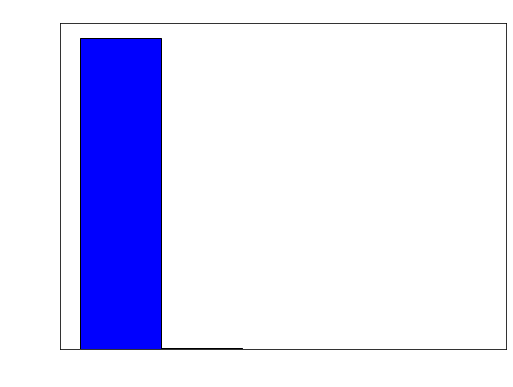

In [66]:
plt.figure(figsize=(8, 6))
plt.hist(df['Sales'], bins=5, color='blue', edgecolor='black')
plt.title('Histogram Distribusi Sales')
plt.xlabel('Sales')
plt.ylabel('Frekuensi')
plt.show()

***Dari hasil diagram Histogram diatas dikatakan bahwa data tidak terdistribusi normal pada kolom 'Sales' Karna data dominan banya di rentang 0 - 4700 an , sedangkan ada data yang mencapai > 4700 an. Dikatakan tidak terdistribusi normal karna nilai mode ≠ median ≠ mean***

### **No.2**

Apakah ada outliers di variable Sales? Di nilai berapa nilai Sales dianggap outliers?

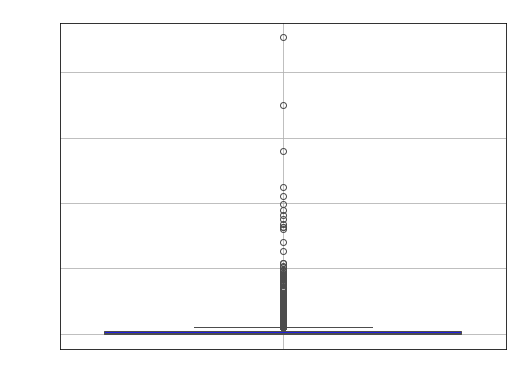

Di nilai -271.71000000000004, 498.93 Sales dianggap Outliers


In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['Sales'], color='blue')
plt.title('Box Plot Distribusi Sales')
plt.xlabel('Sales')
plt.grid(True)
plt.show()

Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Di nilai {lower_bound}, {upper_bound} Sales dianggap Outliers")

***Pada chart Box Plot diatas ditemukan nya outliers dengan posisi yang melebihi Upper Bound dan Lower Bound nya dengan masing-masing nilai pada 498.83 dan -271.71***

### **No.3**

Tampilkan total profit tiap Category

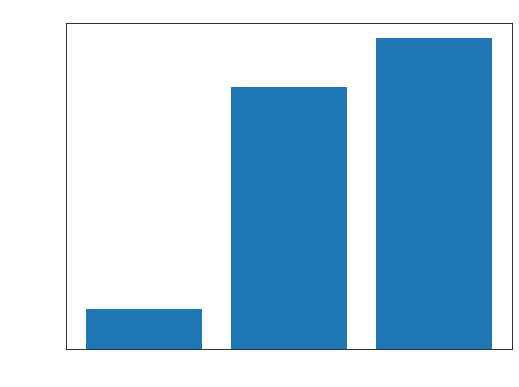

In [39]:
profit = df.groupby('Category')['Profit'].sum()
category = df['Category'].unique()

plt.figure(figsize=(8, 6))
plt.bar(category, profit)
plt.title('Total Profit per Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

### **No.4**

Tampilkan total profit tiap Segment yang dibagi lagi per Category

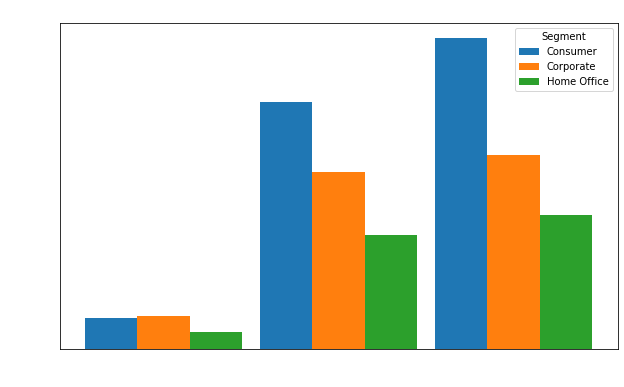

In [48]:
profit_per_segment_category = df.groupby(['Segment', 'Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
bar_width = 0.3

positions = range(len(profit_per_segment_category['Segment'].unique()))
for i, segment in enumerate(profit_per_segment_category['Segment'].unique()):
    category_data = profit_per_segment_category[profit_per_segment_category['Segment'] == segment]
    plt.bar([p + i * bar_width for p in positions], category_data['Profit'], 
            width=bar_width, label=segment)

plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.title('Total Profit per Segment and Category')
plt.xticks([p + bar_width / 2 for p in positions], profit_per_segment_category['Category'].unique())
plt.legend(title='Segment')
plt.show()

### **No.5**

Apakah ada hubungan antara Discount dan Profit? 

In [52]:
df[['Discount','Profit']].corr()

,Discount,Profit
Discount,1.000000,-0.219487
Profit,-0.219487,1.000000


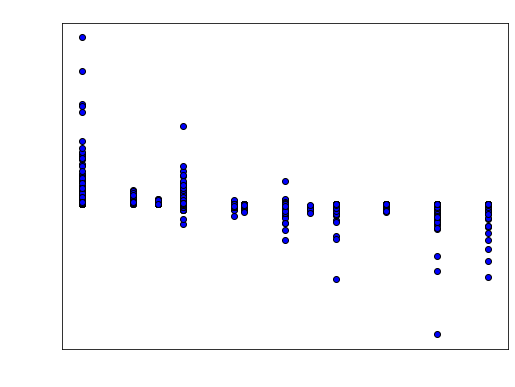

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Discount'], df['Profit'], color='blue', edgecolors='black')
plt.title('Hubungan antara Discount dan Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid
plt.show()

### **No.6**

Tampilkan total profit tiap bulan dari 2016-2019

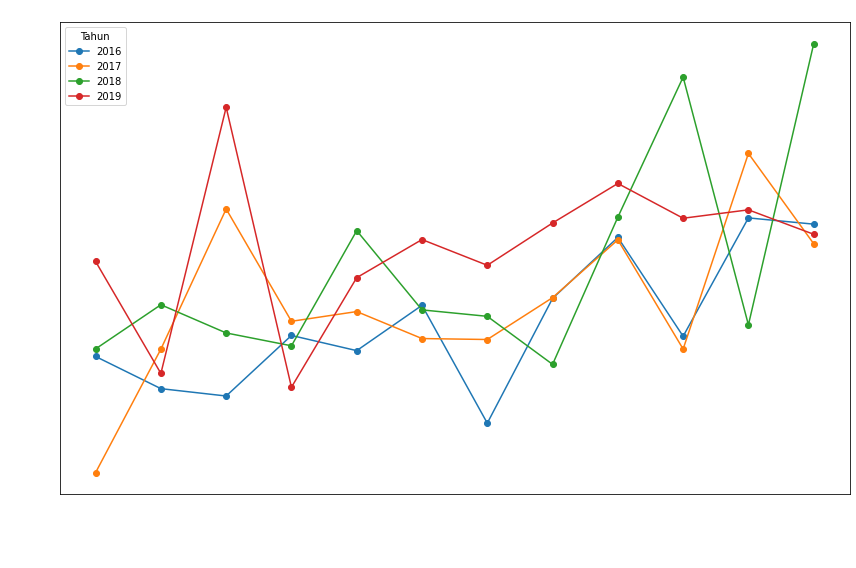

In [64]:
import calendar

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

month_order = list(calendar.month_name)[1:]
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
profit_per_month = df.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

plt.figure(figsize=(12, 8))

for year in profit_per_month['Year'].unique():
    year_data = profit_per_month[profit_per_month['Year'] == year]
    plt.plot(year_data['Month'], year_data['Profit'], marker='o', label=year)

plt.title('Total Profit per Bulan (2016-2019)')
plt.xlabel('Bulan')
plt.ylabel('Total Profit')
plt.legend(title='Tahun')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **No.7**

Bandingkan trend profit pada tanggal 15 dan tanggal 28 dari tiap bulan

InvalidIndexError: (slice(None, None, None), None)

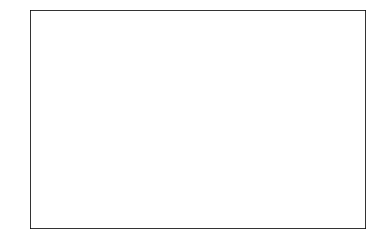

: 